In [7]:
import math
from turtle import color
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import SpectralClustering

In [8]:
df = pd.read_csv("data/Country-data.csv")
df_data_dic = pd.read_csv("data/data-dictionary.csv")
print(df.to_string())

                            country  child_mort  exports  health   imports  income  inflation  life_expec  total_fer    gdpp
0                       Afghanistan        90.2   10.000    7.58   44.9000    1610      9.440        56.2       5.82     553
1                           Albania        16.6   28.000    6.55   48.6000    9930      4.490        76.3       1.65    4090
2                           Algeria        27.3   38.400    4.17   31.4000   12900     16.100        76.5       2.89    4460
3                            Angola       119.0   62.300    2.85   42.9000    5900     22.400        60.1       6.16    3530
4               Antigua and Barbuda        10.3   45.500    6.03   58.9000   19100      1.440        76.8       2.13   12200
5                         Argentina        14.5   18.900    8.10   16.0000   18700     20.900        75.8       2.37   10300
6                           Armenia        18.1   20.800    4.40   45.3000    6700      7.770        73.3       1.69    3220


In [9]:
mean_res = [None]
var_res = [None]
st_dev_res = [None]
for col_name in df.iloc[:, 1:]:
    mean_res.append(np.mean(df[col_name]))
    var_res.append(np.var(df[col_name]))
    st_dev_res.append(np.sqrt(np.var(df[col_name])))

In [10]:
#On crée les nouvelles colonnes pour ajouté de nouvelle donnée au csv
df_data_dic["Mean"] = mean_res
df_data_dic["Variance"] = var_res
df_data_dic["Standard Deviation"] = st_dev_res

print(df_data_dic)
#df_data_dic.to_csv("data/data-dictionary.csv")

   Unnamed: 0 Column Name                                        Description  \
0           0     country                                Name of the country   
1           1  child_mort  Death of children under 5 years of age per 100...   
2           2     exports  Exports of goods and services per capita. Give...   
3           3      health  Total health spending per capita. Given as %ag...   
4           4     imports  Imports of goods and services per capita. Give...   
5           5      Income                              Net income per person   
6           6   Inflation  The measurement of the annual growth rate of t...   
7           7  life_expec  The average number of years a new born child w...   
8           8   total_fer  The number of children that would be born to e...   
9           9        gdpp  The GDP per capita. Calculated as the Total GD...   

           Mean      Variance  Standard Deviation  
0           NaN           NaN                 NaN  
1     38.270060

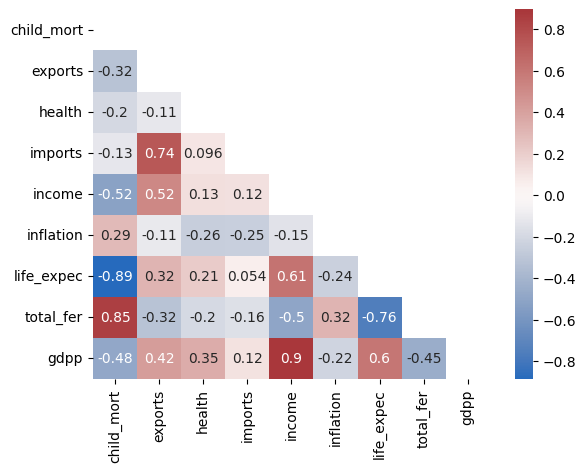

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculer la matrice de corrélation
mat_corr = df.iloc[:, 1:].corr()

# Créer un masque pour la moitié inférieure
mask = np.triu(np.ones_like(mat_corr, dtype=bool))

# Définir une colormap personnalisée
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Créer la heatmap avec le masque et la colormap personnalisée
sns.heatmap(mat_corr, mask=mask, annot=True, cmap="vlag",center=0)

# Afficher la figure
plt.show()

In [12]:
px.histogram(df.sort_values('child_mort',ascending=False), x='country', y='child_mort')

In [13]:
def view_distribution(df,feature,is_ascending):
    px.histogram(df.sort_values(feature,ascending=is_ascending).head(10), x='country', y=feature).show()

In [14]:
view_distribution(df,'exports',False)

     child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3  

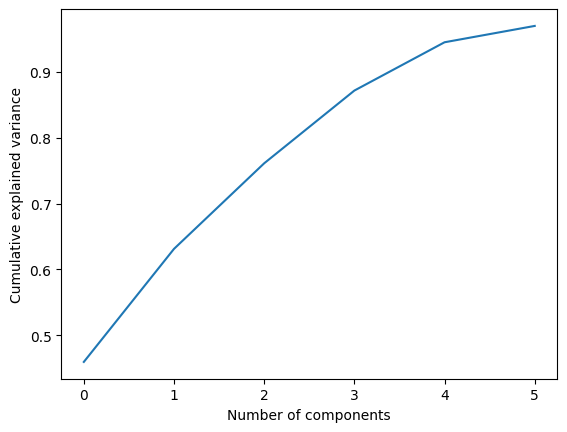

In [15]:
# Créer un pipeline de prétraitement de données
from sklearn.decomposition import PCA


pre_trait = StandardScaler()


pipeline = Pipeline([
    ('pre_trait', pre_trait)  # Etape 2 : standardisation des données
])

donnees_pretraitees = pipeline.fit_transform(df.iloc[:, 1:])

df_pretraite = pd.DataFrame(donnees_pretraitees, columns=df.columns[1:], index=df.index)
print(df_pretraite)

pca = PCA(n_components=0.95)
pca.fit(df_pretraite)
# Plot the explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(False)

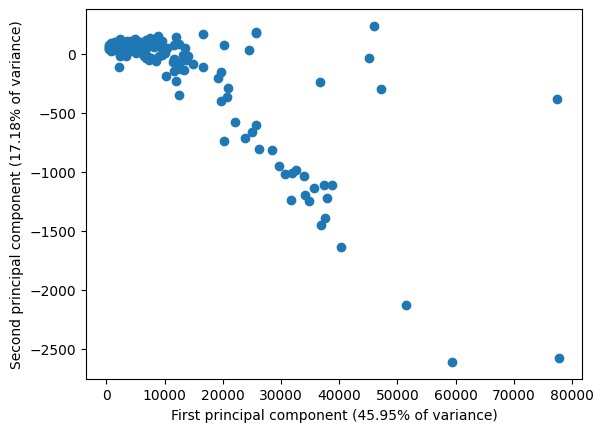

In [16]:
# Get the explained variance ratios for the selected components
variance_ratios = pca.explained_variance_ratio_

plt.figure()
plt.scatter(pca.transform(df.iloc[:,1:])[:, 0], pca.transform(df.iloc[:,1:])[:, 1])
plt.xlabel('First principal component ({}% of variance)'.format(round(variance_ratios[0] * 100, 2)))
plt.ylabel('Second principal component ({}% of variance)'.format(round(variance_ratios[1] * 100, 2)))
plt.grid(False)

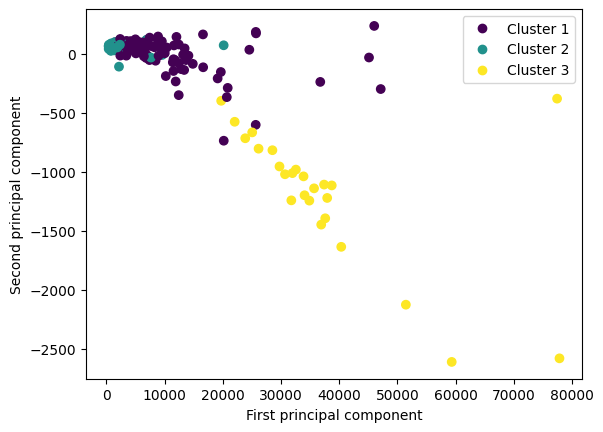

In [17]:
from sklearn.cluster import KMeans

# Create pipeline
pipe = Pipeline(
    [("Pré traitement de la data", pre_trait),
     ("Reduction de la dimension", PCA(n_components=0.95)),
     ("Clustering", SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
      )])

#On retire la colone Country
pipe.fit(df.iloc[:, 1:])
labels = pipe.steps[-1][1].labels_

#On visualise les clusters
plt.figure()
scatter = plt.scatter(pca.transform(df.iloc[:, 1:])[:, 0], pca.transform(df.iloc[:, 1:])[:, 1], c=labels)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.grid(False)

# Ajouter une légende
classes = ['Cluster 1', 'Cluster 2', 'Cluster 3']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

plt.show()

#On ajoute les labels de clasification au dataframe
df["classification"] = labels


In [18]:
print(df.to_string())

                            country  child_mort  exports  health   imports  income  inflation  life_expec  total_fer    gdpp  classification
0                       Afghanistan        90.2   10.000    7.58   44.9000    1610      9.440        56.2       5.82     553               1
1                           Albania        16.6   28.000    6.55   48.6000    9930      4.490        76.3       1.65    4090               0
2                           Algeria        27.3   38.400    4.17   31.4000   12900     16.100        76.5       2.89    4460               0
3                            Angola       119.0   62.300    2.85   42.9000    5900     22.400        60.1       6.16    3530               1
4               Antigua and Barbuda        10.3   45.500    6.03   58.9000   19100      1.440        76.8       2.13   12200               0
5                         Argentina        14.5   18.900    8.10   16.0000   18700     20.900        75.8       2.37   10300               0
6            

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.



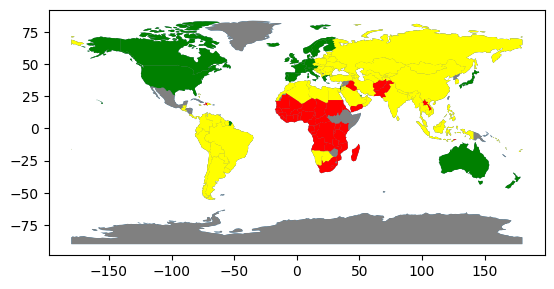

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot()

#Initialisation de la carte en gris
for i in range(len(world.name)):
    world[world.name == world.name[i]].plot(color='grey',ax=ax)
    
#coloration de la carte en fonction des clusters
for i in range(len(df.country)):
    match df.classification[i]:
        case 0:
            world[world.name == df.country[i]].plot(color='yellow',ax=ax)
        case 1:
            world[world.name == df.country[i]].plot(color='red',ax=ax)
        case 2:
            world[world.name == df.country[i]].plot(color='green',ax=ax)

plt.show()